# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from pycaret.classification import *
from scipy.stats import stats
from sklearn.feature_selection import mutual_info_classif as mic
import keras 
from keras.layers import Dense , Flatten 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

# Data Information

Gender: 1=Male, 0=Female

Age: in years

Debt: outstanding debt (scaled)

Married: 1=Married, 0=Single/Divorce/etc.

BankCustomer: 1=has a bank account, 0=doesn't have a bank account

Industry: current or most recent job sector

Ethnicity: ethnicity

YearsEmployed: years employed

PriorDefault: 1=has prior default, 0=no prior default

Employed: 1=employed, 0=unemployed

CreditScore: credit score (scaled)

DriversLicense: 1=has driver license, 0=no driver license

Citizen: citizenship, either ByBirth, ByOtherMeans or Temporary

ZipCode: zip code

Income: income (scaled)

Approved: 1=approved, 0=not approved

In [2]:
df=pd.read_csv("clean_dataset.csv")

In [3]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [5]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


Outliers
-----------
drop 100000 in income doesnt make sense

drop 28.5 in years doesnt make sense

drop 67 in credit scores doesnt make sense

# Data visualization

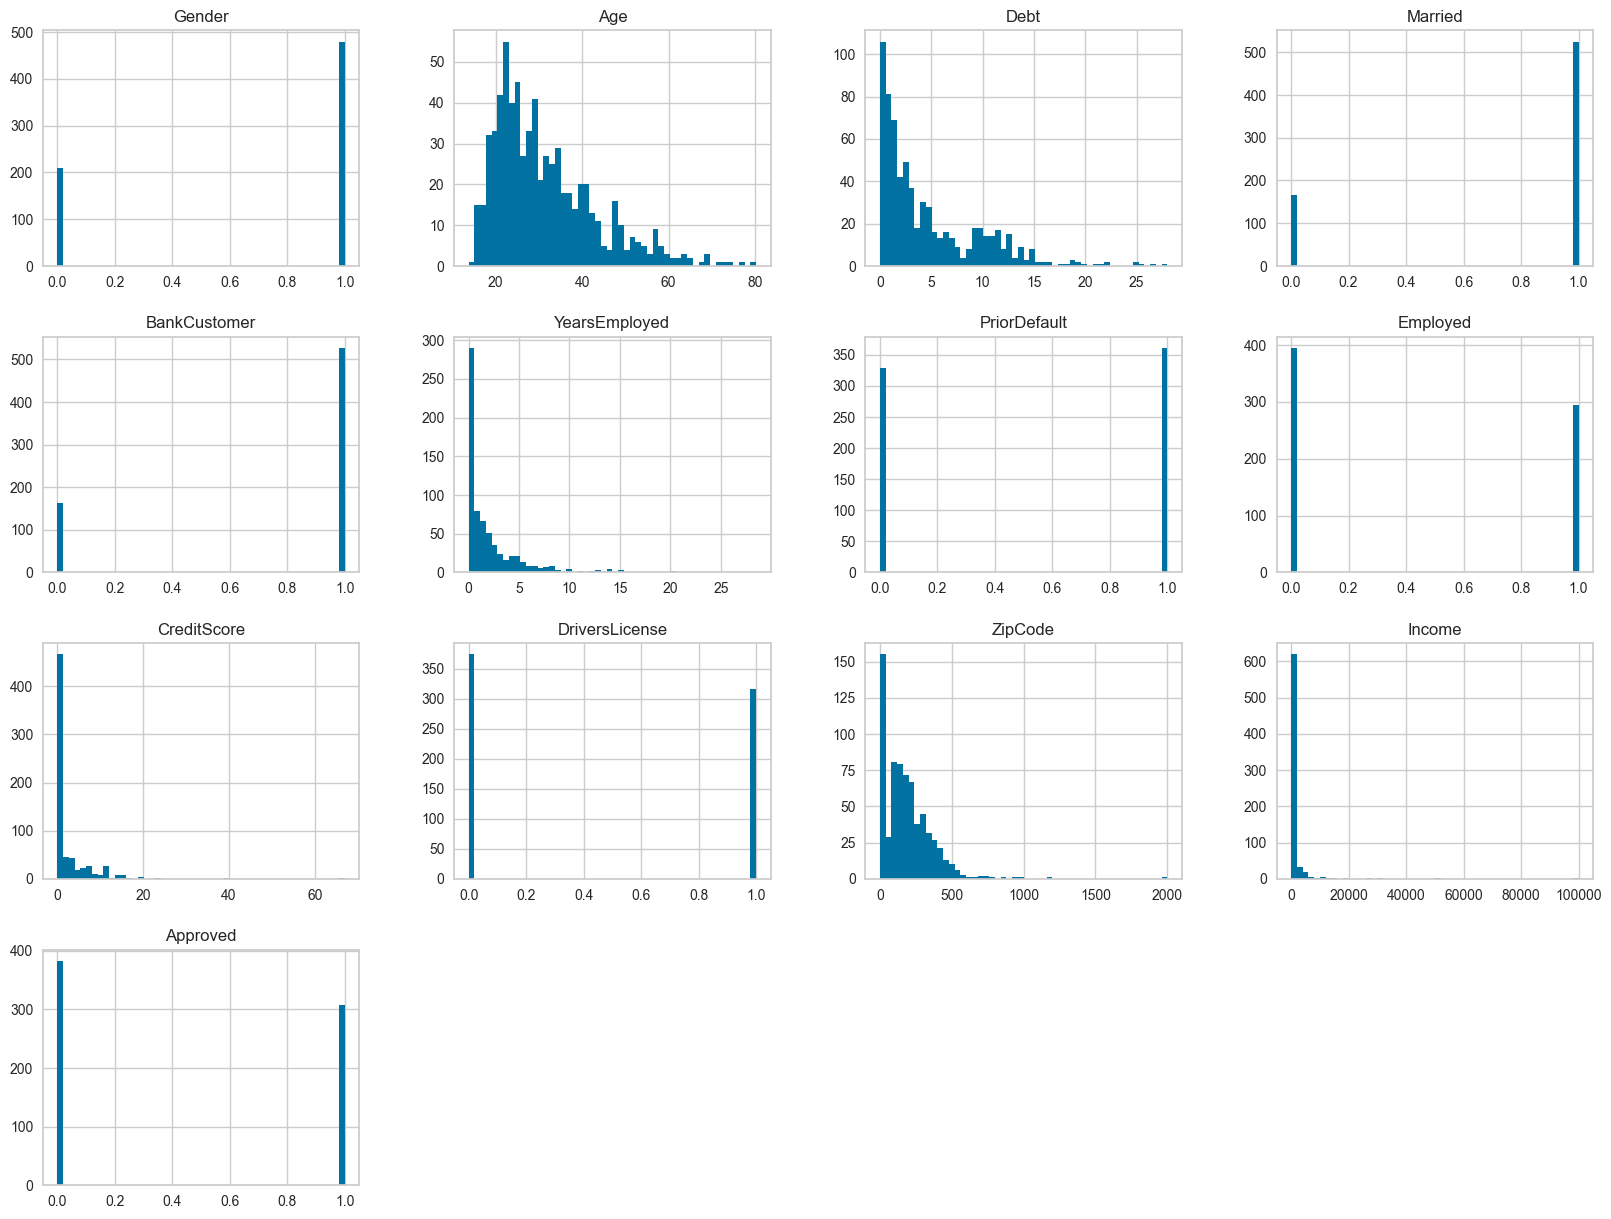

In [6]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Text(0.5, 1.0, 'YearsEmployed Distribution')

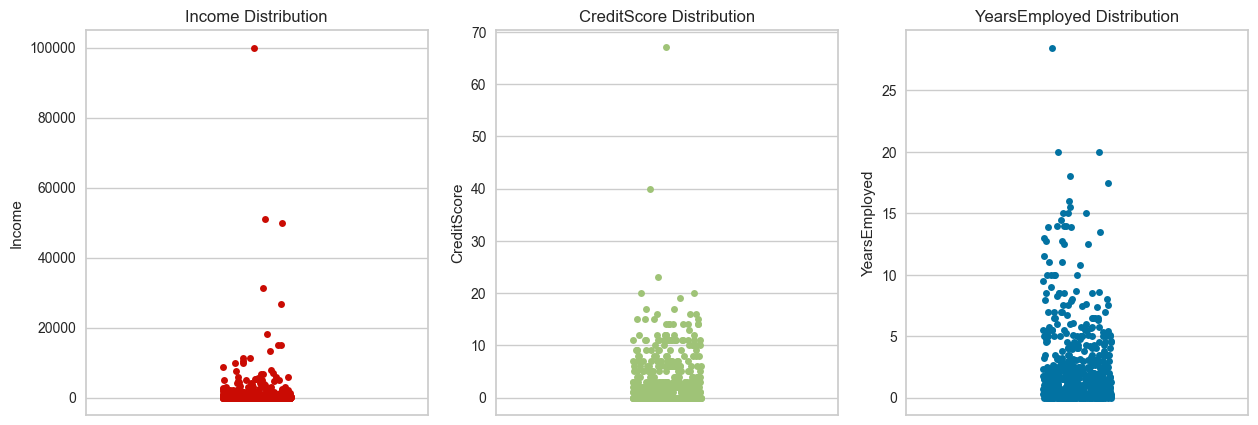

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.stripplot(df['Income'], ax=axes[0] , color="r")
axes[0].set_title('Income Distribution')

sns.stripplot(df['CreditScore'], ax=axes[1] , color="g")
axes[1].set_title('CreditScore Distribution')

sns.stripplot(df['YearsEmployed'], ax=axes[2])
axes[2].set_title('YearsEmployed Distribution')
# plotly

Double check for th outliers before dropping

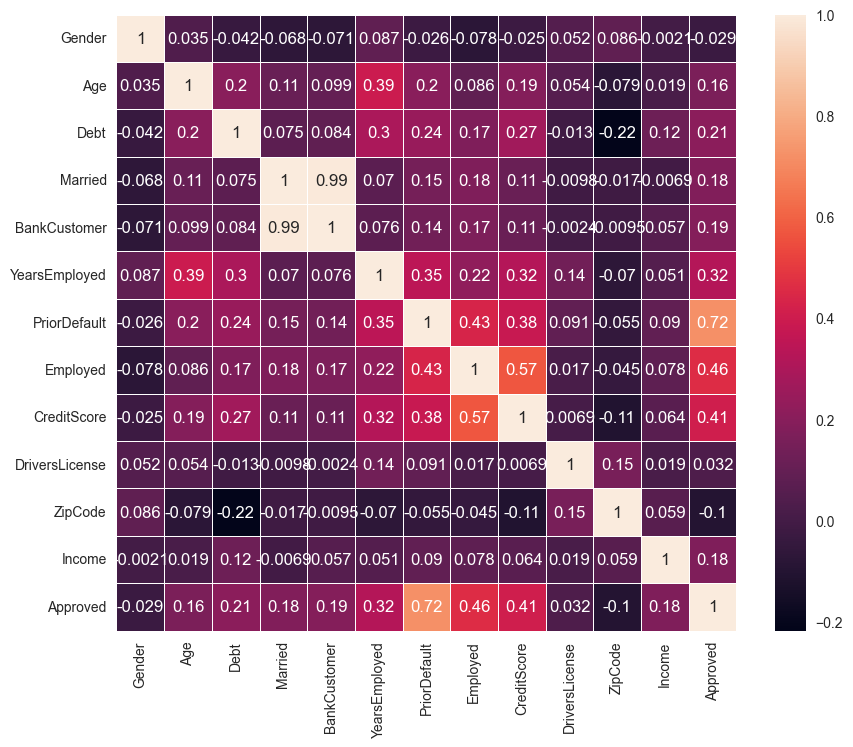

In [8]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), linewidths=0.5, annot=True)

plt.show()

High correlation between Married & Bank customer so its optional to drop one of the features

<AxesSubplot: xlabel='Ethnicity', ylabel='Count'>

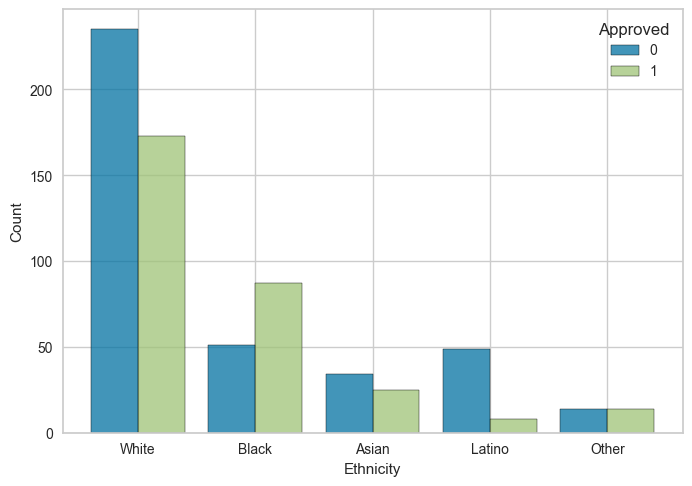

In [9]:
sns.histplot(x="Ethnicity"  , hue = "Approved",data=df ,multiple="dodge",shrink=.8  )

Checking is there any racism in bank

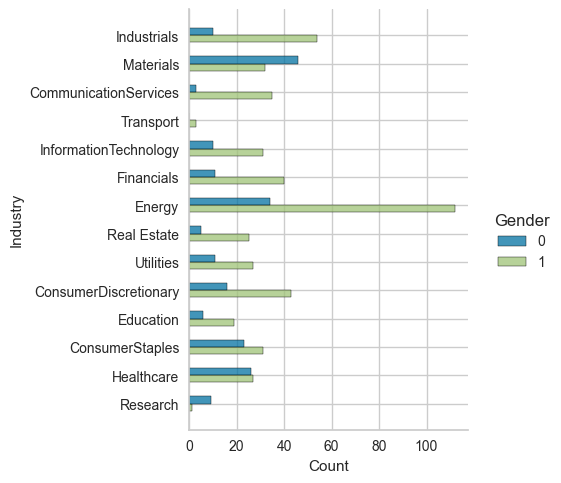

In [10]:
sns.displot( data=df , y="Industry" , hue="Gender" , multiple="dodge" , shrink=.5 )

Number of genders in each job

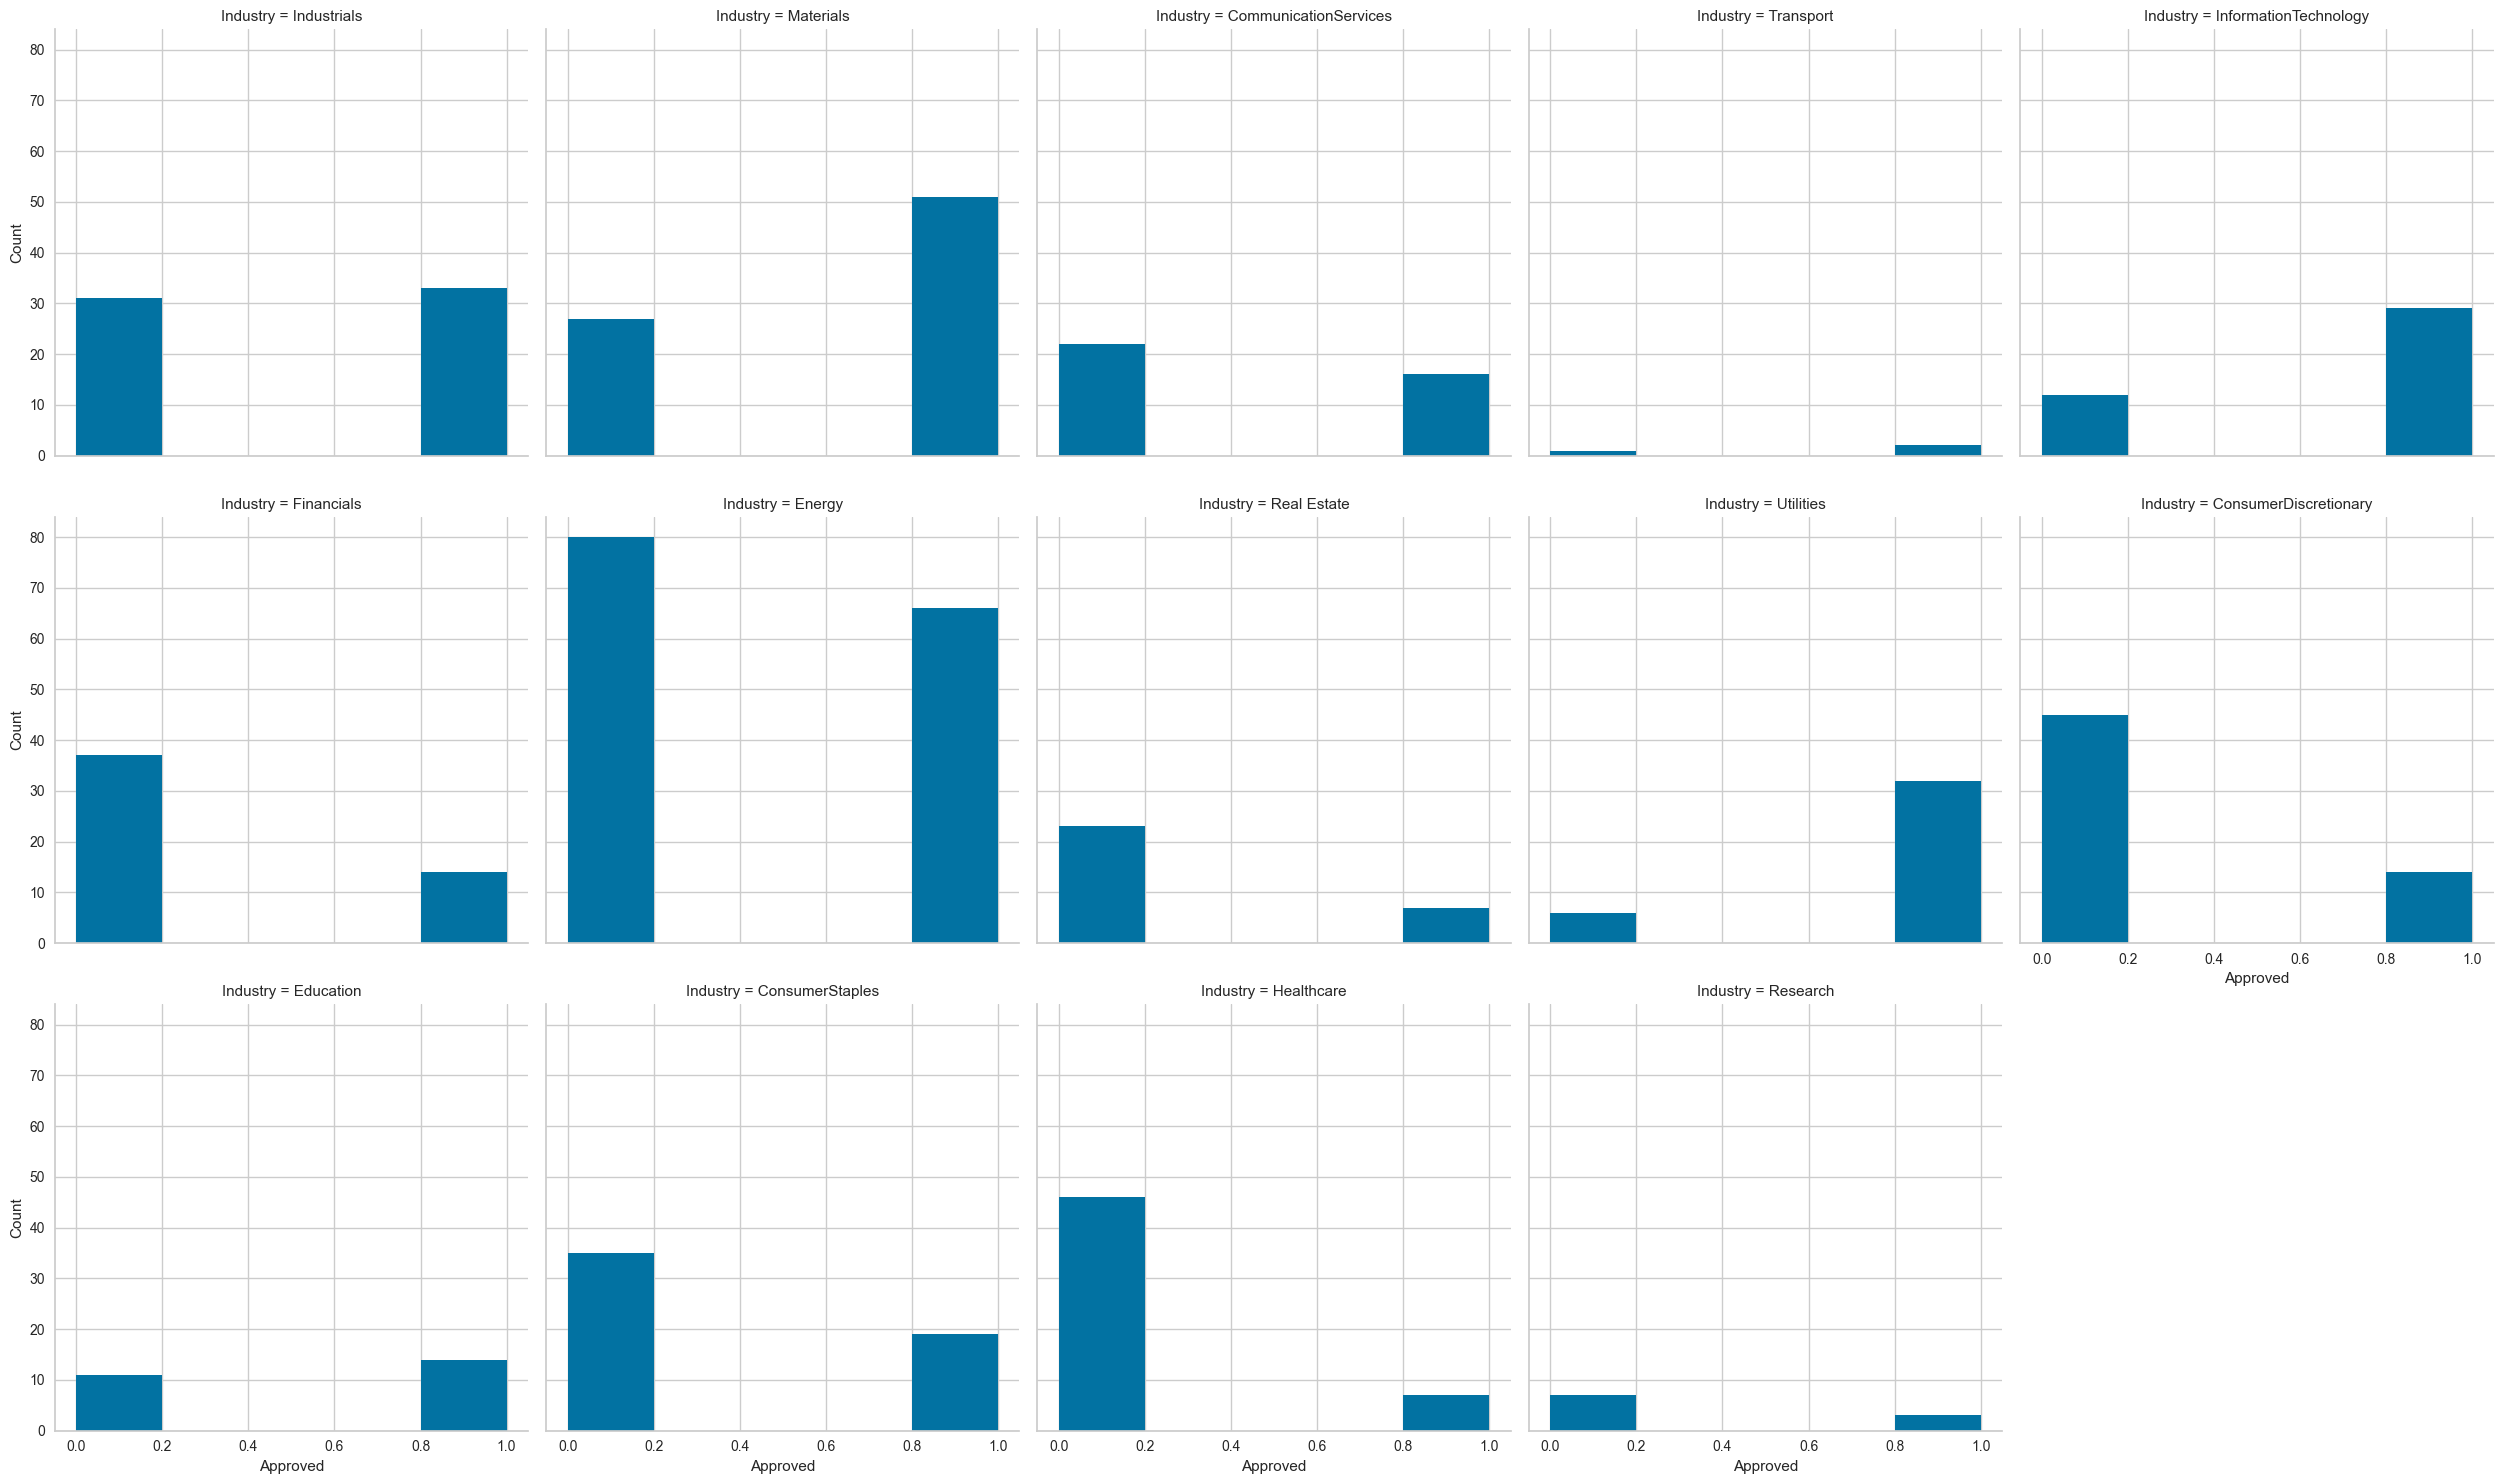

In [11]:
# Distribution of Industry with approval

Industry = sns.FacetGrid(data=df, col='Industry',height=5 ,  col_wrap=5  )
Industry.map_dataframe(plt.hist, x='Approved', bins=5  )
Industry.set(ylabel='Count' )

plt.show()

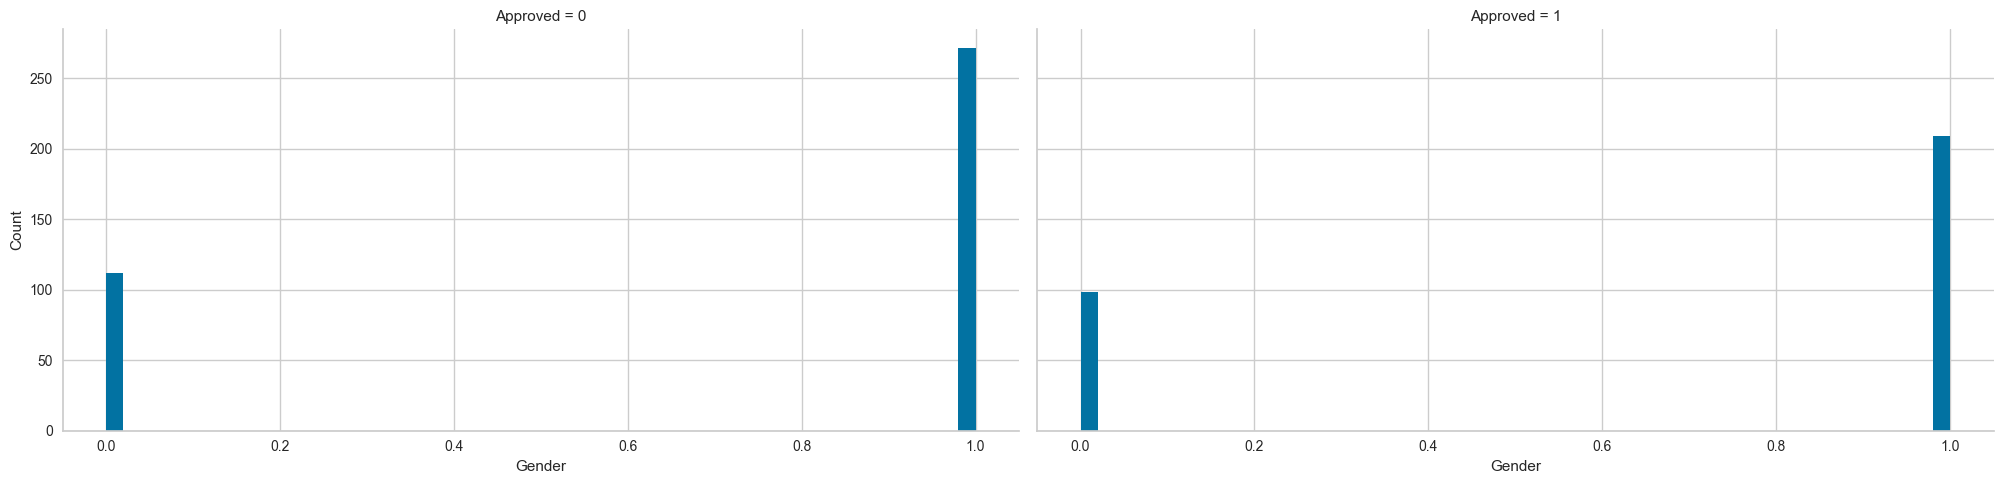

In [12]:
# Distribution of Approval with gender

Gender = sns.FacetGrid(data=df, col='Approved', height=5, aspect=2)
Gender.map(plt.hist, 'Gender', bins=50)
Gender.set(xlabel='Gender', ylabel='Count')
plt.show()

In [13]:
df["Industry"].value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

# Data preprocessing

Discrete values

In [14]:
dis_feat = ['ZipCode', 'Income', 'CreditScore']


In [15]:
disc = mic(df[dis_feat], df.Approved, discrete_features=True)
disc = pd.Series(disc, index=df[dis_feat].columns)

In [16]:
disc

ZipCode        0.201648
Income         0.303647
CreditScore    0.167950
dtype: float64

categorical values

In [17]:
cat_feat = ['Industry', 'Ethnicity', 'Citizen']

encoder = preprocessing.LabelEncoder()
df[cat_feat] = df[cat_feat].apply(encoder.fit_transform)

In [18]:
cate_data = df[['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'Citizen', 
                     'PriorDefault', 'Employed', 'DriversLicense']]


In [19]:
cat = mic(cate_data, df.Approved, discrete_features=True)
cat = pd.Series(cat, index=cate_data.columns)

In [20]:
cat

Gender            0.000418
Married           0.016834
BankCustomer      0.018488
Industry          0.075664
Ethnicity         0.032413
Citizen           0.006957
PriorDefault      0.295079
Employed          0.108329
DriversLicense    0.000500
dtype: float64

continous values

In [21]:
con_feat = ['Age', 'Debt', 'YearsEmployed']
cont = mic(df[con_feat], df.Approved, discrete_features=False)
cont = pd.Series(cont, index=df[con_feat].columns)

In [22]:
cont

Age              0.001796
Debt             0.038828
YearsEmployed    0.074051
dtype: float64

drop any feature <0.01

In [23]:
data_x = df.drop(['Citizen', 'Age', 'DriversLicense', 'Gender'], axis=1)
data_y = df.Approved

normalization

In [24]:
data_x_norm = stats.zscore(data_x)


In [25]:
data_x_norm=data_x_norm.drop(["Approved"] , axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_x_norm, data_y, test_size=0.2 ,random_state=1245)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    int32  
 6   Ethnicity       690 non-null    int32  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int32  
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int32(3), int64(10)
memory usage: 78.3 KB


In [28]:
model=LogisticRegression()

model.fit(X_train , y_train  )

LogisticRegression()

In [29]:
y_pred=model.predict(X_test)

In [30]:
accuracy_score(y_test , y_pred)

0.8695652173913043

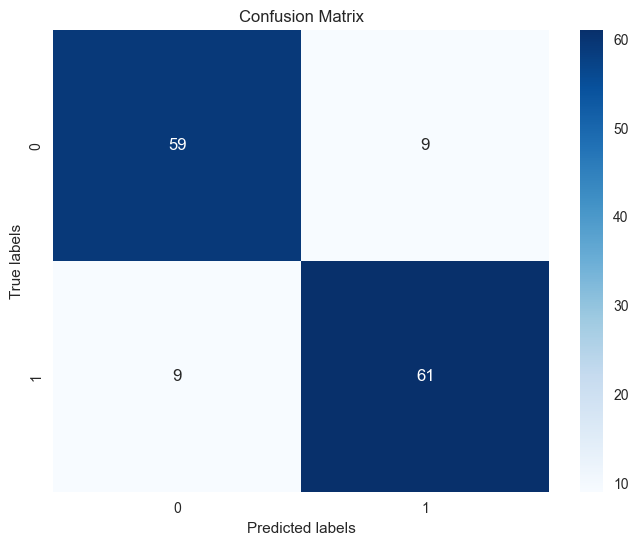

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Trying ANN

In [32]:
model=Sequential()

model.add(Dense(200 , activation='relu' ))

model.add(Dense(100 , activation='relu' ))

model.add(Dense(100 , activation='relu' ))

model.add(Dense(1 , activation='sigmoid'))

In [33]:
model.compile(loss=binary_crossentropy , optimizer=Adam() , metrics=["accuracy"])

In [34]:
model.fit(X_train , y_train , epochs=10 , batch_size=40  , validation_data=(X_test, y_test) )

Epoch 1/10


14/14 [==============================] - 1s 17ms/step - loss: 0.5797 - accuracy: 0.7717 - val_loss: 0.4260 - val_accuracy: 0.8696
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3725 - accuracy: 0.8641 - val_loss: 0.3396 - val_accuracy: 0.8551
Epoch 3/10
14/14 [==============================] - 0s 4ms/step - loss: 0.3289 - accuracy: 0.8696 - val_loss: 0.3298 - val_accuracy: 0.8696
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3080 - accuracy: 0.8732 - val_loss: 0.3274 - val_accuracy: 0.8768
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2957 - accuracy: 0.8786 - val_loss: 0.3470 - val_accuracy: 0.8696
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.8859 - val_loss: 0.3312 - val_accuracy: 0.8768
Epoch 7/10
14/14 [==============================] - 0s 4ms/step - loss: 0.2766 - accuracy: 0.8841 - val_loss: 0.3511 - val_accuracy: 0.8623
Epoch 8/10
14/14 

In [35]:
score = model.evaluate(X_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8551
Test Loss: 0.34523746371269226
Test accuracy: 0.8550724387168884


In [36]:
#!pip install --upgrade pycaret

In [37]:
from pycaret.utils import version
version()

'3.2.0'

In [38]:
exp = ClassificationExperiment()
exp.setup(df,  target='Approved', session_id=555, train_size=0.75, preprocess=True)


,Description,Value
0,Session id,555
1,Target,Approved
2,Target type,Binary
3,Original data shape,"(690, 16)"
4,Transformed data shape,"(690, 16)"
5,Transformed train set shape,"(517, 16)"
6,Transformed test set shape,"(173, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [39]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [40]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8686,0.9409,0.8522,0.8583,0.8515,0.7337,0.7395,0.9720
rf,Random Forest Classifier,0.8608,0.9296,0.8348,0.8547,0.8407,0.7174,0.7230,0.0540
lr,Logistic Regression,0.8551,0.9238,0.8652,0.8224,0.8414,0.7083,0.7123,1.3760
ridge,Ridge Classifier,0.8532,0.0000,0.9174,0.7919,0.8482,0.7081,0.7186,0.0080
lda,Linear Discriminant Analysis,0.8532,0.9206,0.9174,0.7919,0.8482,0.7081,0.7186,0.0070
gbc,Gradient Boosting Classifier,0.8492,0.9315,0.8261,0.8383,0.8289,0.6943,0.6988,0.0440
et,Extra Trees Classifier,0.8473,0.9132,0.8217,0.8352,0.8267,0.6903,0.6926,0.0560
lightgbm,Light Gradient Boosting Machine,0.8471,0.9326,0.8130,0.8450,0.8235,0.6892,0.6962,0.1310
ada,Ada Boost Classifier,0.8357,0.9080,0.8174,0.8160,0.8152,0.6674,0.6694,0.0320
dt,Decision Tree Classifier,0.8066,0.8042,0.7826,0.7868,0.7826,0.6085,0.6111,0.0070


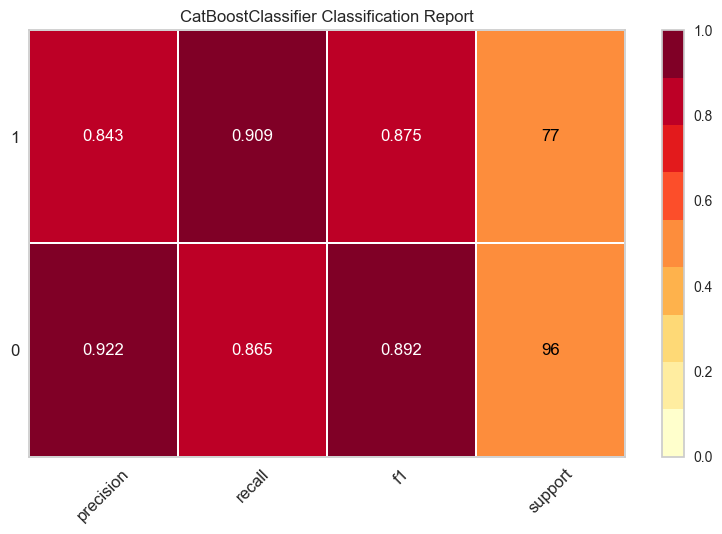

In [41]:
exp.plot_model(best, plot = 'class_report')

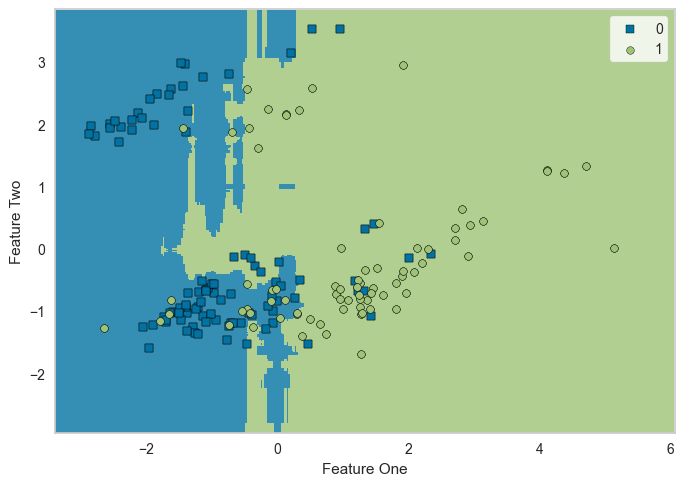

In [42]:
exp.plot_model(best, plot = 'boundary')

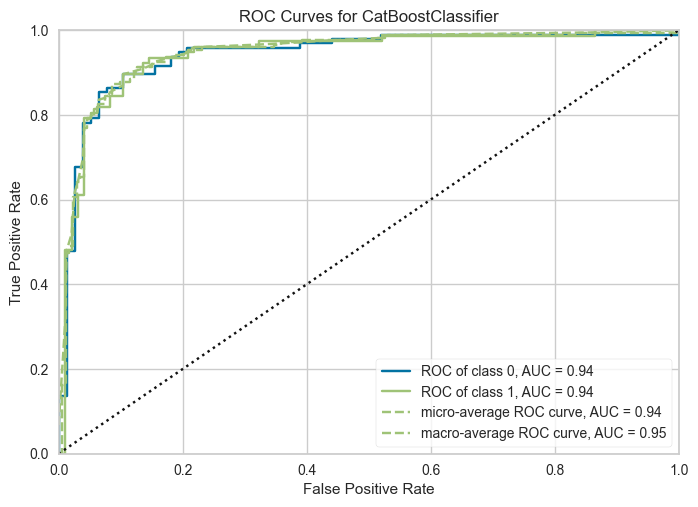

In [43]:
exp.plot_model(best, plot = 'auc')

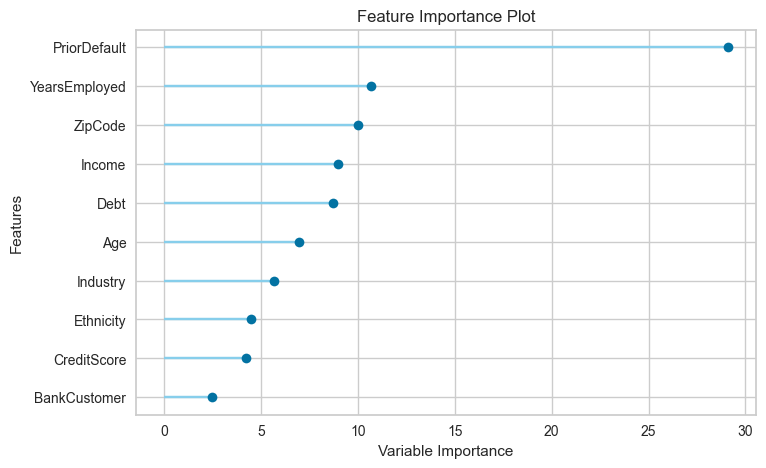

In [44]:
exp.plot_model(best, plot = 'feature')

In [45]:
exp.save_model(best, 'my_pycaret_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Age', 'Debt', 'Married',
                                              'BankCustomer', 'Industry',
                                              'Ethnicity', 'YearsEmployed',
                                              'PriorDefault', 'Employed',
                                              'CreditScore', 'DriversLicense',
                                              'Citizen', 'ZipCode', 'Income'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=Non...
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(e